# Experiment - 16 June 2017 

## Task 1 - Cohort extraction

In [68]:
%matplotlib inline
import numpy as np
import scipy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from numpy.polynomial import Polynomial as P
from pylab import *
from kapteyn import kmpfit

sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (16, 8)}); 
np.random.seed(20170619)

In [2]:
wards = pd.read_excel("./Coll.centre key_v3.xlsx")
ICU_wards = wards[wards['ICU']==1.0]
General_wards = wards[wards['General Ward']==1.0]
exclude = wards[wards['To exclude']==1.0]
location = 'Coll.Centre'
targets = list(ICU_wards[location])
list(ICU_wards[location])

['NICU', 'PAED HDU', 'PICU']

In [17]:
# Read Data
H1 = pd.read_excel("H1.xlsx")
A1 = pd.read_excel("A1.xlsx")

In [18]:
H1.to_pickle("H1.pkl")
A1.to_pickle("A1.pkl")

In [5]:
H1 = pd.read_pickle("H1.pkl")
A1 = pd.read_pickle("A1.pkl")

In [19]:
dataframe = pd.read_pickle("A1.pkl")

In [20]:
dataframe['DoB'] = pd.to_datetime(dataframe['DoB'], format='%y%m%d')
dataframe['Collected'] = pd.to_datetime(dataframe['Collected'], format='%y%m%d')
dataframe['age'] = (dataframe['Collected'] - dataframe['DoB']).astype('<m8[Y]')
dataframe = dataframe.sort_values(['Research.ID', 'Collected'])
#dataframe.loc[dataframe['Research.ID']==1007, ['Research.ID', 'DoB', location,'Collected', 'age', 'SODIUM']]

In [21]:
dataframe

,Research.ID,DoB,Sex,Requested,Collected,time,Received,Coll.Centre,Clinical Notes,HAEM SPECIMEN TYPE,...,CELL DYN DELTA FLAG,WBC VIABILITY,IMMATURE RETIC FRACTION,BANDS,BLASTS FLAG,VARIANT LYMPH,IMM GRANS FLAG,PLTS CLUMP,TOTAL NEUT CALC,age
0,1,1956-06-01,F,2012-11-03 00:00:00,2012-11-03,9:20 pm,2012-11-03,WOMEN'S ASSESSMENT SERVICE,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.32,56.0
1,2,1957-02-11,F,2016-02-02 00:00:00,2016-02-02,11:40:00,2016-02-02,PAEDIATRIC EMERG,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.46,58.0
2,3,1954-10-27,F,2015-12-17 00:00:00,2015-12-17,10:05:00,2015-12-18,ROYAL ADEL HOSPITAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
3,4,1967-08-06,F,2014-02-15 00:00:00,2014-03-07,9:25 am,2014-03-07,ROYAL DARWIN HOSPITAL,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.88,46.0
4,5,1992-11-18,F,2013-12-20 00:00:00,2013-12-20,10:26:00,2013-12-20,QUEEN VICTORIA OPERATING SUITE,Autism.,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
7,6,1994-05-22,F,2016-03-04 00:00:00,2016-03-04,10:45:00,2016-03-04,PREGNANCY INDUCTION ASSESMENT,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.58,21.0
5,6,1994-05-22,F,2016-03-05 00:00:00,2016-03-05,6:40 am,2016-03-05,POST NATAL WARD,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.40,21.0
6,6,1994-05-22,F,2016-03-10 00:00:00,2016-03-10,10:30:00,2016-03-10,POST NATAL WARD,skin rash.,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
8,7,1983-10-01,F,2013-10-13 00:00:00,2013-10-13,7:30 am,2013-10-13,DELIVERY SUITE,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.70,30.0
9,8,1994-01-28,F,2012-11-06 00:00:00,2012-11-06,4:50 pm,2012-11-06,ANTENATAL CLINIC,NaN,VeBlE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.66,18.0


In [22]:
print("Number of patients in PICU: {0}".format(dataframe.loc[dataframe[location]=='PICU',
                                                             'Research.ID'].unique().shape[0]))

Number of patients in PICU: 1904


In [23]:
print("Number of patients in NICU: {0}".format(dataframe.loc[dataframe[location]=='NICU',
                                                             'Research.ID'].unique().shape[0]))

Number of patients in NICU: 2195


In [24]:
print("Number of patients in PAED HDU: {0}".format(dataframe.loc[dataframe[location]=='PAED HDU',
                                                             'Research.ID'].unique().shape[0]))

Number of patients in PAED HDU: 111


In [25]:
include_crit = [i and j for i, j in zip(dataframe['age'] < 18.0, dataframe[location].map(lambda x: 
                                                                               x not in list(exclude[location])))]
include_cohort = dataframe.loc[include_crit, :]
group = include_cohort.groupby(by=['Research.ID'])
print("Number of teenage patients in ICU and general wards: {0}".format(include_cohort['Research.ID'].unique().shape[0]))

Number of teenage patients in ICU and general wards: 28530


In [26]:
# No BUN CALCIUM TOTAL? Creatinine Hemoglobin Platelet
# Exclude LACTATE because cohort too small
total_labs = ['WBC']

In [27]:
def addcol(x, lab_values=total_labs): 
    cond1 = False
    
    for icu in targets:
        temp = bool(x[location].str.contains(icu).sum())
        cond1 = temp or cond1 
    
    cond2 = bool((x['age'] < 18).sum())
    
    x['included'] = (cond1 and cond2)
    
    if x[location].iloc[0] in targets:
        x['included'] = False
    
    # inlcuded column is whether the patient is included in ICU 
    
    select = x[location].isin(targets)
    a = select.sum()
    for test in lab_values:
        labmax = test + "_max"
        labmin = test + "_min"
        if a:
            movetime = x.loc[select, "Collected"].iloc[0]
            #print(pd.to_datetime(df['Date'] + ' ' + df['Time']))
            #print(x["Collected"] < movetime)
            #print(x['Research.ID'])
            #print(movetime)
            #print(movetime - pd.Timedelta("24 hours "))
            ##print(movetime)
            #print(x[location])
            condition = [i and j for i, j in zip(x['Collected'].map(lambda x: x >= movetime-pd.Timedelta("48 hours")), 
                                                 x['Collected'].map(lambda x: x <= movetime))
                                                 #~x[location].isin(targets))
                                                ]
            #print(condition)
            _max = x.loc[condition, test].max()
            _min = x.loc[condition, test].min()
        else:
            #print(x[test])
            _max = x[test].max()
            _min = x[test].min()
        x[labmax] = _max
        x[labmin] = _min
    
    return x

In [28]:
#data.loc[data['BICARBONATE'].str.contains('>'), 'BICARBONATE']

In [29]:
data = group.apply(addcol)

In [53]:
data.loc[data['included'], ['Research.ID', 'age', location, 'included', 'WBC_max', 'WBC_min']]

In [32]:
for lab in total_labs:
    print("Number of teenage patients in general wards and ICU with "+lab+" readings: {0}".format(
                                data.loc[:, ['Research.ID', 'age', location, 
                                'Collected', lab, 'included']].dropna()['Research.ID'].unique().shape[0]))

Number of teenage patients in general wards and ICU with WBC readings: 27724


In [33]:
for lab in total_labs:
    print("Number of teenage patients in ICU with/without "+lab+" readings: {0}".format(
                                data.loc[data['included'], ['Research.ID', 'age', location, 
                                'Collected', lab, 'included']]['Research.ID'].unique().shape[0]))

Number of teenage patients in ICU with/without WBC readings: 761


In [34]:
for lab in total_labs:
    print("Number of teenage patients in ICU with " + lab + " readings: {0}".format(
                                data.loc[data['included'], ['Research.ID', 'age', location, 
                                'Collected', lab, 'included']].dropna()['Research.ID'].unique().shape[0]))

Number of teenage patients in ICU with WBC readings: 761


In [35]:
for lab in total_labs:
    print("Number of teenage patients in ICU with " + lab + " readings within 24 hrs: {0}".format(
                                data.loc[data['included'], ['Research.ID', 'age', location, 
                                'Collected', lab, lab+"_max", lab+"_min", 'included']].dropna()['Research.ID'].unique().shape[0]))

Number of teenage patients in ICU with WBC readings within 24 hrs: 755


In [36]:
data.to_pickle("./data_A1.pkl")

In [37]:
data = pd.read_pickle("./data_A1.pkl")

## Task 2: Distribution and patient in ICU ratio plot 

Use lab value = "SODIUM" as an example here. 

* Plot distribution histogram of lab value 
* In each bar of the histogram, plot the ratio of patients in ICU with lab values in this range ( ICU subjects / total subjects with in this value range). Note: ICU ratio is only plotted when number of patients > 10 in case of outliers

In [38]:
lab_value = total_labs
lab_minmax = []
for i in lab_value:
    lab_minmax.extend([i+"_min", i+"_max"])
print(lab_minmax)

['WBC_min', 'WBC_max']


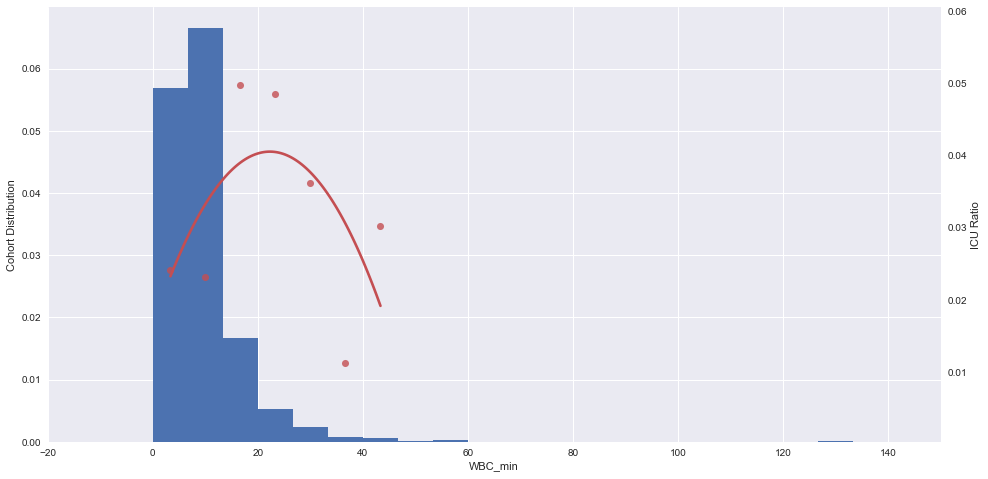

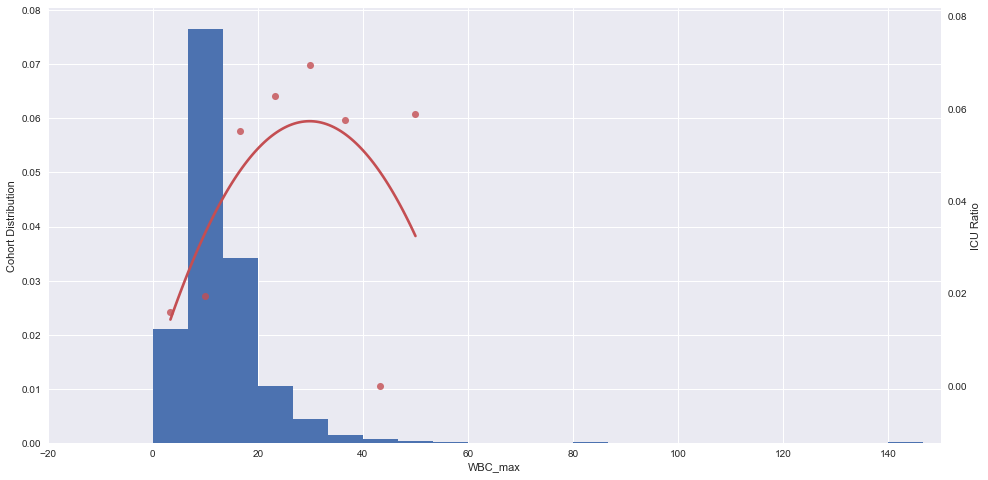

In [74]:
tenth, nintieth = np.percentile(data[lab_value].dropna(), [5, 95])

for lab in lab_minmax:
    fig, ax = plt.subplots()
    counts, bins, patches = ax.hist(data[lab].dropna(), bins=150, normed=True)
    ax.set_xlabel(lab)
    ax.set_ylabel("Cohort Distribution")
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    testar = []
    x = []
    y = []
    for i, reading in enumerate(bins[:-1]):
        criterion = [i and j for i, j in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x) and x >= bins[i] and x <= bins[i+1]))]
        subjects = data.loc[criterion, 'Research.ID'].unique()
        groups = data[data['Research.ID'].isin(subjects)].groupby('Research.ID')

        if len(subjects) > 10:
            value_count = float(groups.included.agg('max').sum()) / float(len(subjects))
            x.append((bins[i] + bins[i+1]) / 2.0)
            y.append(value_count)

    ax2 = ax.twinx()
    #print(x)
    #print(y)
    #ax2.scatter(x=x, y=y, c='r')
    ax2.grid(False)
    x, y = pd.Series(x[:], name=""), pd.Series(y[:], name="")
    ax2 = sns.regplot(x=x, y=y,
                      scatter_kws={"s": 50},
                      color='r',
                      order=2, ci=None, truncate=True)
    ax2.set_ylabel("ICU Ratio")
    ax.set_xbound(lower=-20, upper=150)
    #ax2.set_xbound(lower=tenth, upper=nintieth)

## Task 3.a : Min/Max probability plot

for lab value i in 5 percentile to 95 percentile: 
$$
    P(y=1|x=i) = \frac{P(x=i|y=1) \cdot P(y=1)}{P(x=i)}
$$

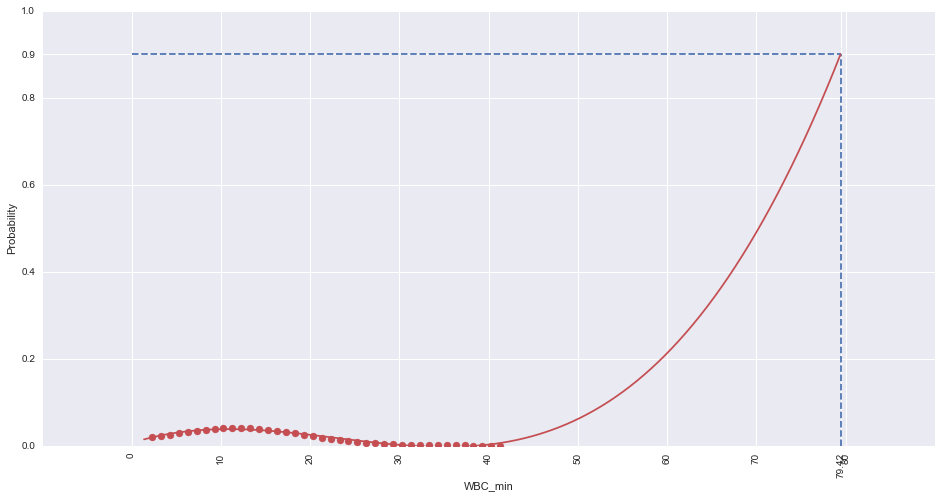

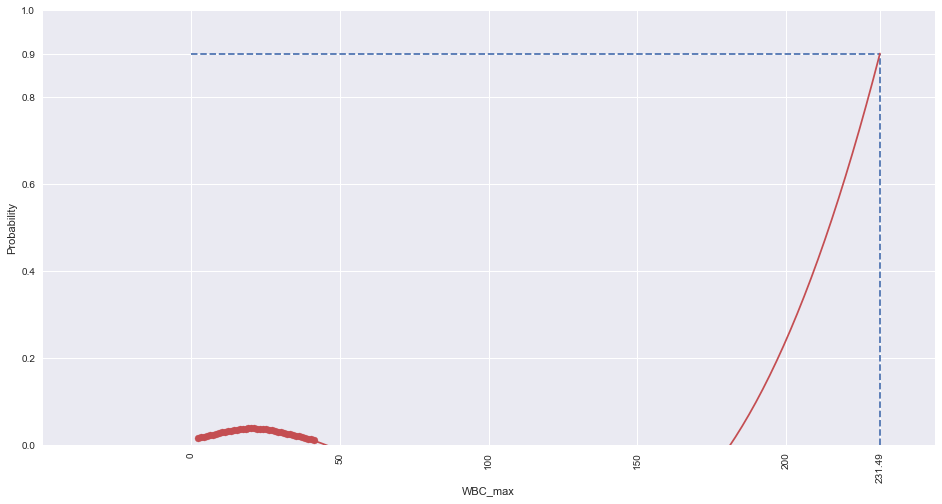

In [73]:
for lab in lab_minmax:
    tenth, nintieth = np.percentile(data[lab].dropna(), [1, 99])
    _max, _min = np.max(data[lab]), np.min(data[lab])
    fig, ax = plt.subplots()
    
    
    _crit = [i and j for i, j in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x)))]
    _subjects = data.loc[_crit, 'Research.ID'].unique()
    _group = data[data['Research.ID'].isin(_subjects)].groupby('Research.ID')
    
    X = _group[lab].agg('max').as_matrix()
    y = _group['included'].agg('max').astype(int).as_matrix()
    
    #bins = np.arange(tenth, nintieth)
    #bins = np.linspace(tenth, nintieth, 20)
    
    _x = []
    _y = []
    
    #p_y_1 = y.sum() / y.shape[0]
    p_y_1 = 761.0 / 28530.0
    x_mean = np.mean(X)
    x_std = np.std(X)
    x_norm = scipy.stats.norm(x_mean, x_std)
    
    pos_crit = [i and j and z for i, j, z in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x)), 
                                                 data['included'])]
    pos_subjects = data.loc[pos_crit, 'Research.ID'].unique()
    pos_group = data[data['Research.ID'].isin(pos_subjects)].groupby('Research.ID')
    X_pos = pos_group[lab].agg('max').as_matrix()
    y_pos = pos_group['included'].agg('max').astype(int).as_matrix()
    X_pos_mean = np.mean(X_pos)
    X_pos_std = np.std(X_pos)
    X_pos_norm = scipy.stats.norm(X_pos_mean, X_pos_std)
    #print(bins)
    for i in bins:
        _p = (X_pos_norm.pdf(i) * p_y_1) / x_norm.pdf(i)
        #if _p > 1:
        #print(X_pos_norm.pdf(i))
        #print(x_norm.pdf(i))
        #print(_p)
        if _p > 0 and _p < 1:
            _x.append(i)
            _y.append(_p)
    ax.scatter(x=_x, y=_y, c='r')
    #print(_x)
    #print(_y)
    #_x, _y = pd.Series(_x[:], name=""), pd.Series(_y[:], name="")
    #ax = sns.regplot(x=_x, y=_y,
    #                  scatter_kws={"s": 50},
    #                  color='r',
    #                  order=3, ci=None, truncate=False)
    #print(ax.lines[0].get_ydata())
    #p = np.poly1d(np.polyfit(x=_x, y=_y, deg=3))
    #ax.plot(p)
    #print(_x)
    #print(_y)
    p = P.fit(_x, _y, 3)
    roots = (p-.9).roots()
    for i in roots:
        if i.imag == 0: x_plot = i.real 
    plt.plot((0, x_plot), (.9, .9), 'b-', linestyle='--')
    plt.plot((x_plot, x_plot), (0, .9), 'b-', linestyle='--')
    xp = np.linspace(tenth, x_plot, 100) if x_plot>tenth else np.linspace(x_plot, nintieth, 100)
    #xp = np.linspace(_min, _max, 30)
    #print(_x)
    
    plt.plot(_x, _y, '.', xp, p(xp), '-', color='r')
    plt.ylim(0, 1)
    #ax.set_xbound(lower=_min, upper=nintieth)
    #ax.set_ylim(1.0)
    #ax.set_xlim(400)
    #ax.set_xbound(upper=nintieth)
    ax.set_xlabel(lab)
    ax.set_ylabel("Probability")
    
    plt.draw()
    labels = [ i.get_text() for i in ax.get_xticklabels()]
    locs=list(ax.get_xticks())
    ylabels = [ i.get_text() for i in ax.get_yticklabels()]
    ylocs=list(ax.get_yticks())
    if lab[:6]=='SODIUM': 
        x_plot = int(x_plot)
    else:
        x_plot = round(x_plot, 2)
    labels.append(x_plot)
    locs.append(x_plot)
    ylabels.append(0.9)
    ylocs.append(0.9)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_xticks(locs)
    ax.set_yticklabels(ylabels)
    ax.set_yticks(ylocs)

## Task 3.b : Min/Max probability plot (Log-logistic Regression)

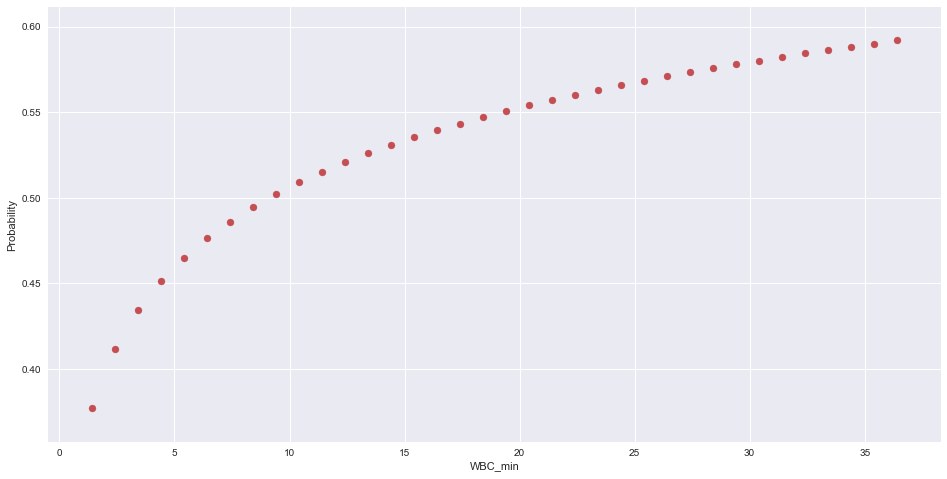

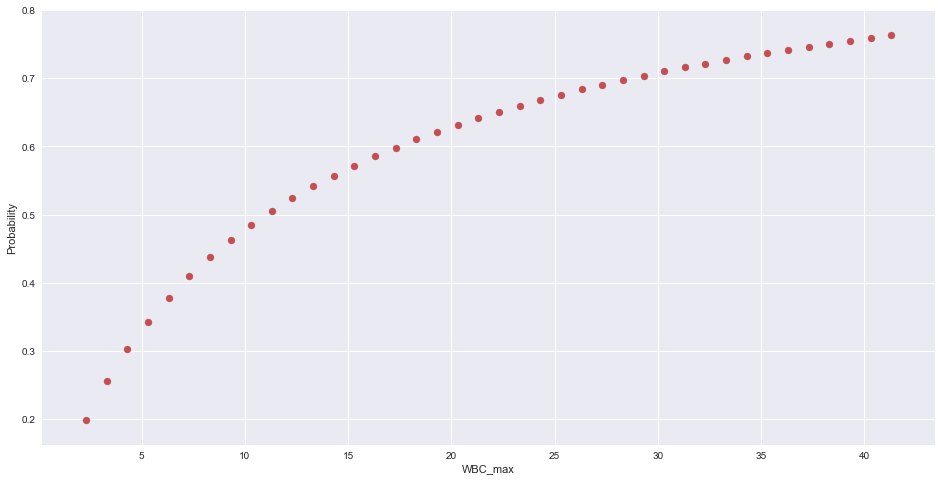

In [75]:
for lab in lab_minmax:
    clf = LogisticRegression(class_weight='balanced')
    
    tenth, nintieth = np.percentile(data[lab].dropna(), [1, 99])
    _crit = [i and j for i, j in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x)))]
    _subjects = data.loc[_crit, 'Research.ID'].unique()
    _group = data[data['Research.ID'].isin(_subjects)].groupby('Research.ID')
    
    X = _group[lab].agg('max').as_matrix().reshape(-1, 1)
    #print(X)
    X = np.log(X)
    #print(X)
    y = _group['included'].agg('max').astype(int).as_matrix()
    #print(y.shape)
    clf.fit(X=X, y=y)
    
    fig, ax = plt.subplots()
    ax.set_xbound(lower=tenth, upper=nintieth)
    ax.set_xlabel(lab)
    ax.set_ylabel("Probability")
    # bins = np.linspace(tenth, nintieth, num=30)
    bins = np.arange(tenth, nintieth)
    _x = []
    _y = []
    
    for i in bins:
        #print(np.log(i))
        _prob = clf.predict_proba(X=np.array(np.log([i])).reshape(-1,1))
        #print(clf.classes_)
        #print(_prob)
        _x.append(i)
        #print(_prob[0][1])
        _y.append(_prob[0][1])
    ax.scatter(x=_x, y=_y, c='r')
    #print(_x)
    #print(_y)
    #_x, _y = pd.Series(_x[:], name=""), pd.Series(_y[:], name="")
    #ax = sns.regplot(x=_x, y=_y,
    #                  scatter_kws={"s": 50},
    #                  color='r',
    #                  order=3, ci=None, truncate=False)

## Task 4: Cumulative frequency plot

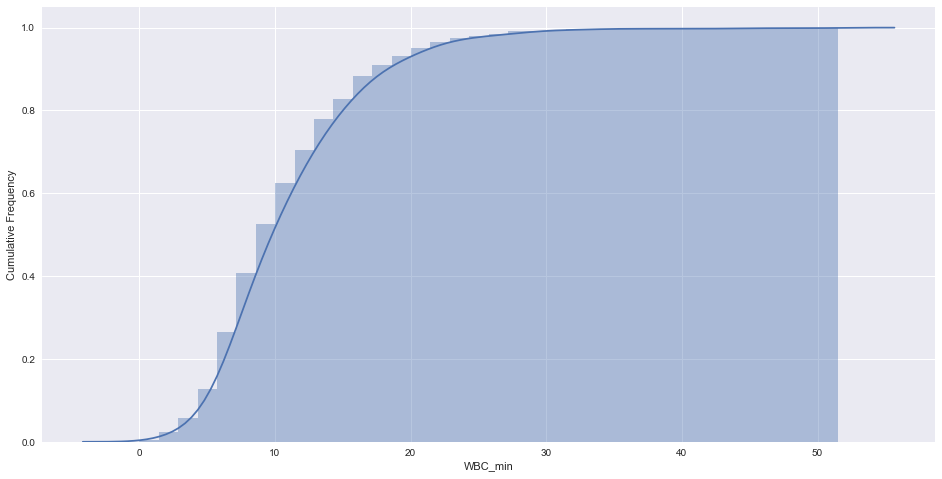

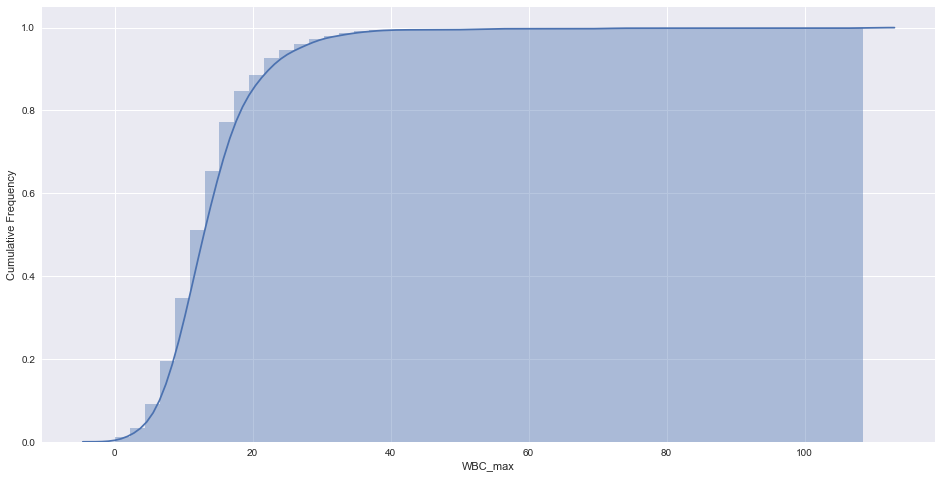

In [76]:
for lab in lab_minmax:
    fig, ax = plt.subplots()
    tenth, nintieth = np.percentile(data[lab].dropna(), [5, 95])
    
    crit_x = [i and j for i, j in zip(data['included'], data[lab].map(lambda x: ~np.isnan(x)))]
    subjects = data.loc[crit_x, 'Research.ID'].unique()
    x = []
    y = []
    for i in subjects:
        temp = np.max(data.loc[data['Research.ID']==i, lab])
        x.append(temp)
        
        temp_y = np.max(data.loc[data['Research.ID']==i, 'included'])
        y.append(temp_y)
    #print(x[:100])
    #print(y[:100])

    sns.distplot(x,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
    ax.set_xlabel(lab)
    ax.set_ylabel("Cumulative Frequency")

## (_* Removed *_) Task 3: Min / Max odds ratio plot 

Plot ICU odds ratio

Cohort (age < 18) for value range x: (when x < 140)

|                      | Outcomes: Converted to ICU | Not converted to ICU |   |   |
|----------------------|-----------------------------|------------------------------|---|---|
|  Exposures: Max/Min value <= x    | a                           | b                            |   |   |
| Max/Min value > x | c                           | d                            |   |   |

when x >= 140 

|                      | Outcomes: Converted to ICU | Not converted to ICU |   |   |
|----------------------|-----------------------------|------------------------------|---|---|
|  Exposures: Max/Min value >= x    | a                           | b                            |   |   |
| Max/Min value < x | c                           | d                            |   |   |


Odds Ratio (OR) = (a/b) / (c/d) = (a × d) / (b × c)




In [ ]:
# teenagers = data.loc[data.age < 18.0, 'Research.ID'].unique()
# OR_cohort = data[data['Research.ID'].isin(teenagers)].copy()
# print(len(teenagers))

In [ ]:
# for lab in lab_minmax:
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     tenth, nintieth = np.percentile(data[lab].dropna(), [5, 95])
    
#     for i, ax in enumerate((ax1, ax2)):
#         if i==0:
#             x = np.linspace(tenth, 140.0, num=15)
#             y = []
#             for _x in x:
                
#                 crit_a = [i and j for i, j in zip(data['included'], data[lab].map(lambda x: ~np.isnan(x) and x <= _x))]
#                 a = data.loc[crit_a, 'Research.ID'].unique()
#                 a = float(len(a))

#                 crit_b = [i and j and z for i, j, z in zip(~data['included'], data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x) and x <= _x))]
#                 b = data.loc[crit_b, 'Research.ID'].unique()
#                 b = float(len(b))

#                 crit_c = [i and j for i, j in zip(data['included'], data[lab].map(lambda x: ~np.isnan(x) and x > _x))]
#                 c = data.loc[crit_c, 'Research.ID'].unique()
#                 c = float(len(c))

#                 crit_d = [i and j and z for i, j, z in zip(~data['included'], data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x) and x > _x))]
#                 d = data.loc[crit_d, 'Research.ID'].unique()
#                 d = float(len(d))
                
#                 y.append(a * d / (b * c))
#             x, y = pd.Series(x[:], name=""), pd.Series(y[:], name="")
#             sns.regplot(x=x, y=y,
#                         color='r',
#                         ax=ax, 
#                         order=4, ci=None, truncate=True)
#             #ax.set_xbound(lower=tenth, upper=nintieth)
#             ax.set_xlabel(lab)
#             ax.set_ylabel("Odds Ratio")
#         else:
#             x = np.linspace(140.0, nintieth, num=15)
#             y = []
#             for _x in x:
                
#                 crit_a = [i and j for i, j in zip(data['included'], data[lab].map(lambda x: ~np.isnan(x) and x >= _x))]
#                 a = data.loc[crit_a, 'Research.ID'].unique()
#                 a = float(len(a))

#                 crit_b = [i and j and z for i, j, z in zip(~data['included'], data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x) and x >= _x))]
#                 b = data.loc[crit_b, 'Research.ID'].unique()
#                 b = float(len(b))

#                 crit_c = [i and j for i, j in zip(data['included'], data[lab].map(lambda x: ~np.isnan(x) and x < _x))]
#                 c = data.loc[crit_c, 'Research.ID'].unique()
#                 c = float(len(c))

#                 crit_d = [i and j and z for i, j, z in zip(~data['included'], data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x) and x < _x))]
#                 d = data.loc[crit_d, 'Research.ID'].unique()
#                 d = float(len(d))
                
#                 y.append(a * d / (b * c))
#             x, y = pd.Series(x[:], name=""), pd.Series(y[:], name="")
#             sns.regplot(x=x, y=y,
#                         scatter_kws={"s": 50},
#                         color='r',
#                         ax=ax,
#                         order=4, ci=None, truncate=True)
#             #ax.set_xbound(lower=tenth, upper=nintieth)
#             ax.set_xlabel(lab)
#             ax.set_ylabel("Odds Ratio")

In [ ]:
# def model(p, x):
#     a, b, c = p
#     return a*np.exp(b*x)+c

# for lab in lab_minmax:
#     tenth, nintieth = np.percentile(data[lab].dropna(), [5, 95])
#     _max, _min = np.max(data[lab]), np.min(data[lab])
#     fig, ax = plt.subplots()
    
#     _crit = [i and j for i, j in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x)))]
#     _subjects = data.loc[_crit, 'Research.ID'].unique()
#     _group = data[data['Research.ID'].isin(_subjects)].groupby('Research.ID')
    
#     X = _group[lab].agg('max').as_matrix()
#     y = _group['included'].agg('max').astype(int).as_matrix()
    
#     #bins = np.arange(tenth, nintieth)
#     bins = np.linspace(tenth, nintieth, 20)
#     _x = []
#     _y = []
#     #p_y_1 = y.sum() / y.shape[0]
#     p_y_1 = 763.0 / 25309.0
#     x_mean = np.mean(X)
#     x_std = np.std(X)
#     x_norm = scipy.stats.norm(x_mean, x_std)
    
#     pos_crit = [i and j and z for i, j, z in zip(data['age'] < 18.0, data[lab].map(lambda x: ~np.isnan(x)), 
#                                                  data['included'])]
#     pos_subjects = data.loc[pos_crit, 'Research.ID'].unique()
#     pos_group = data[data['Research.ID'].isin(pos_subjects)].groupby('Research.ID')
#     X_pos = pos_group[lab].agg('max').as_matrix()
#     y_pos = pos_group['included'].agg('max').astype(int).as_matrix()
#     X_pos_mean = np.mean(X_pos)
#     X_pos_std = np.std(X_pos)
#     X_pos_norm = scipy.stats.norm(X_pos_mean, X_pos_std)
#     #print(bins)
#     for i in bins:
#         _p = (X_pos_norm.pdf(i) * p_y_1) / x_norm.pdf(i)
#         #if _p > 1:
#         #print(X_pos_norm.pdf(i))
#         #print(x_norm.pdf(i))
#         #print(_p)
#         _x.append(i)
#         _y.append(_p)
#     ax.scatter(x=_x, y=_y, c='r')
#     f = kmpfit.simplefit(model, [.1, .1, .1], _x, _y)
#     print(f.params)
#     a, b, c = f.params
#     print(b)
#     print(np.float64(b)*_x)
#     dfdp = [np.exp(np.float64(b)*_x), a*_x*np.exp(b*_x), 1]
#     yhat, upper, lower = f.confidence_band(x, dfdp, 0.95, model)
#     ix = np.argsort(_x)
#     for i, l in enumerate((upper, lower, yhat)):
#         plt.plot(_x[ix], l[ix], c='g' if i == 2 else 'r', lw=2)